In [ ]:
##"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [ ]:
from google.colab import widgets
import time

In [ ]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 170
        self.reward= 0

    def reset(self):
        self.timestep = 0        
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.wall1 = [0,1]
        self.wall2 = [0,3]
        self.wall3 = [2,2]
        self.wall4 = [3,0]
        pos= self.agent_pos[0]*4+self.agent_pos[1]
        self.state = np.zeros([4,4])
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5
        self.state[tuple(self.agent_pos)] = 1
        self.reward=1
        observation = self.state.flatten()
        return pos
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1
        if action == 1:
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1
        if action == 3:
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1


        state_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        new_pos = state_table[tuple(self.agent_pos)]
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        
        reward_table= np.array([[-1,-20,-1,-20],[-1,-1,-1,-1],[-1,-1,-20,-1],[-20,-1,-1,100]])
        reward= reward_table[tuple(self.agent_pos)]
        self.timestep += 1
        done = True if new_pos == 15 else False #check if terminal or not 
        info = {}
        return new_pos, reward, done, info
        
    def render(self):
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5

        self.state[tuple(self.agent_pos)] = 1
        plt.imshow(self.state)

    def stochastic(self, action):
        if action == 0 :
          return np.random.choice([0,1,2,3], p=[0.91, 0.03, 0.03, 0.03])

        elif action == 1 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.91, 0.03, 0.03])  

        elif action == 2 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.03, 0.91, 0.03])

        elif action == 3 :
          return np.random.choice([0,1,2,3], p=[0.03, 0.03, 0.03, 0.91])
    

In [ ]:
from matplotlib import figure
env = GridEnvironment()
# Q_Table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.65
epsilon = 1


total_epochs=0
episodes=5000
total_timestep = []
total_reward = []
total_epsilon = []
total_steps = []
all_epochs = 0


for i in range(episodes):
    state = env.reset()
    r, epochs, reward, steps = 0, 0, 0, 0
    done = False
    
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explorative
            steps += 1
        else:
            action = np.argmax(q_table[state]) # Exploitative 
            steps += 1
        stochastic_action = env.stochastic(action)   #pass the action through a stochastic function, and use the updated action for the rest of the iteration
        next_state, reward, done, info = env.step(stochastic_action) 
        
        old_value = q_table[state, stochastic_action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, stochastic_action] = new_value

        
        state = next_state
        epochs += 1
        r+=reward
             
    total_timestep.append(epochs)
    total_reward.append(r) 
    total_epochs += epochs
    epsilon= np.exp(-4*i/episodes)  #increase value of 4 to increase the decay and vice-versa. Higher decay = more greedy actions will be preferred
    total_epsilon.append(epsilon)     #store in an array so we can print a graph later on
    total_steps.append(steps)




print('TRAINING done!\n')
###       ADD PLOTS HERE
plt.plot(total_reward) 
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.figure()
plt.plot(total_epsilon)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')
plt.figure()         


print("Q Table:\n", q_table)
print("Steps per episode", np.sum(total_steps)/episodes)
print('Episodes done: ', episodes)

plt.plot(total_steps)
plt.title("Steps vs Episodes")
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.figure()




NameError: ignored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Episode: 10


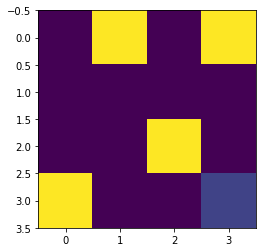

<IPython.core.display.Javascript object>

TEST done!



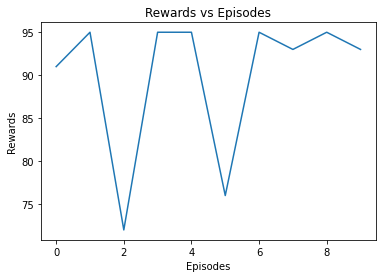

<Figure size 432x288 with 0 Axes>

In [ ]:
episodes = 10
total_reward=[]
tot_eps =[]
total_eps = 0

for eps in range(episodes):
    r = 0
    state = env.reset()
    epochs, reward = 0, 0   
    done = False    
    while not done:
        action = np.argmax(q_table[state])
        stochastic_action = env.stochastic(action)
        state, reward, done, info = env.step(stochastic_action)
        r += reward    
        epochs += 1
        if eps > 8 :
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            print(f"Episode:", eps+1)
            env.render()  
          time.sleep(2)
    total_reward.append(r) 
    total_eps.append(epochs) 

plt.plot(total_reward)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()      

print("TEST done!\n")